In [ ]:
# !pip install GDAL-3.1.4-cp38-cp38-win_amd64.whl 
# !pip install Fiona-1.8.17-cp38-cp38-win_amd64.whl
# !pip install Shapely-1.7.1-cp38-cp38-win_amd64.whl
# !pip install geopandas

Mac users can install GDAL via homebrew, or try:

In [ ]:
#conda install -c conda-forge geopandas

In [1]:
#COVID19Map.py
### import all modules that we will use in this lesson
import geopandas
import numpy as np
import pandas as pd
# We won't actually use datetime directly. Since the dataframe index will use 
# data formatted as datetime64, I import it in case I need to use the datetime
# module to troubleshoot later 
import datetime
# you could technically call many of the submodules from matplotlib using mpl., 
#but for convenience we explicitly import submodules. These will be used for 
# constructing visualizations
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
# If you choose to make a dynamic visualization for the homework
from matplotlib.animation import FuncAnimation
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.ticker as mtick
import datadotworld as dw

In [2]:
def import_geo_data(filename, index_col = "Date", FIPS_name = "FIPS"):
    # import county level shapefile
    map_data = geopandas.read_file(filename = filename,
                                  index_col = index_col)
    # rename fips code to match variable name in COVID-19 data
    map_data.rename(columns={"State":"state"}, inplace = True)
    # Combine statefips and county fipsto create a single fips value
    # that indicates state and county
    map_data[FIPS_name] = map_data["STATEFP"].astype(str) +\
        map_data["COUNTYFP"].astype(str)
    map_data[FIPS_name] = map_data[FIPS_name].astype(np.int64)
    map_data.set_index(FIPS_name, inplace = True)
    
    return map_data

In [3]:
# I include this dictionary to convenienlty cross reference state names and
# state abbreviations.
# I include this dictionary to convenienlty cross reference state names and
# state abbreviations.
state_dict = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ',
    'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 
    'Delaware': 'DE', 'District of Columbia': 'DC', 'Florida': 'FL', 
    'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL',
    'Indiana': 'IN', 'Iowa': 'IA','Kansas': 'KS', 'Kentucky': 'KY',
    'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA',
    'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH',
    'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC',
    'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI',
    'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX',
    'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA',
    'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 
    'Wyoming': 'WY'}

plt.rcParams['axes.ymargin'] = 0
plt.rcParams['axes.xmargin'] = 0
plt.rcParams.update({'font.size': 32})



In [6]:
fips_name = "fips_code"
map_data = import_geo_data(
    filename = "countiesWithStatesAndPopulation.shp",
    index_col ="Date", FIPS_name = fips_name)

In [8]:
map_data

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,NAME,LSAD,ALAND,AWATER,Population,state,geometry
fips_code,,,,,,,,,,,
21007,21,007,00516850,0500000US21007,Ballard,06,639387454,69473325,7888.0,Kentucky,"POLYGON ((-89.18137 37.04630, -89.17938 37.053..."
21017,21,017,00516855,0500000US21017,Bourbon,06,750439351,4829777,19788.0,Kentucky,"POLYGON ((-84.44266 38.28324, -84.44114 38.283..."
21031,21,031,00516862,0500000US21031,Butler,06,1103571974,13943044,12879.0,Kentucky,"POLYGON ((-86.94486 37.07341, -86.94346 37.074..."
21065,21,065,00516879,0500000US21065,Estill,06,655509930,6516335,14106.0,Kentucky,"POLYGON ((-84.12662 37.64540, -84.12483 37.646..."
21069,21,069,00516881,0500000US21069,Fleming,06,902727151,7182793,14581.0,Kentucky,"POLYGON ((-83.98428 38.44549, -83.98246 38.450..."
...,...,...,...,...,...,...,...,...,...,...,...
31073,31,073,00835858,0500000US31073,Gosper,06,1186616237,11831826,1990.0,Nebraska,"POLYGON ((-100.09510 40.43866, -100.08937 40.4..."
39075,39,075,01074050,0500000US39075,Holmes,06,1094405866,3695230,43960.0,Ohio,"POLYGON ((-82.22066 40.66758, -82.19327 40.667..."
48171,48,171,01383871,0500000US48171,Gillespie,06,2740719114,9012764,26988.0,Texas,"POLYGON ((-99.30400 30.49983, -99.28234 30.499..."


Text(0.5, 1.0, 'Minnesota')

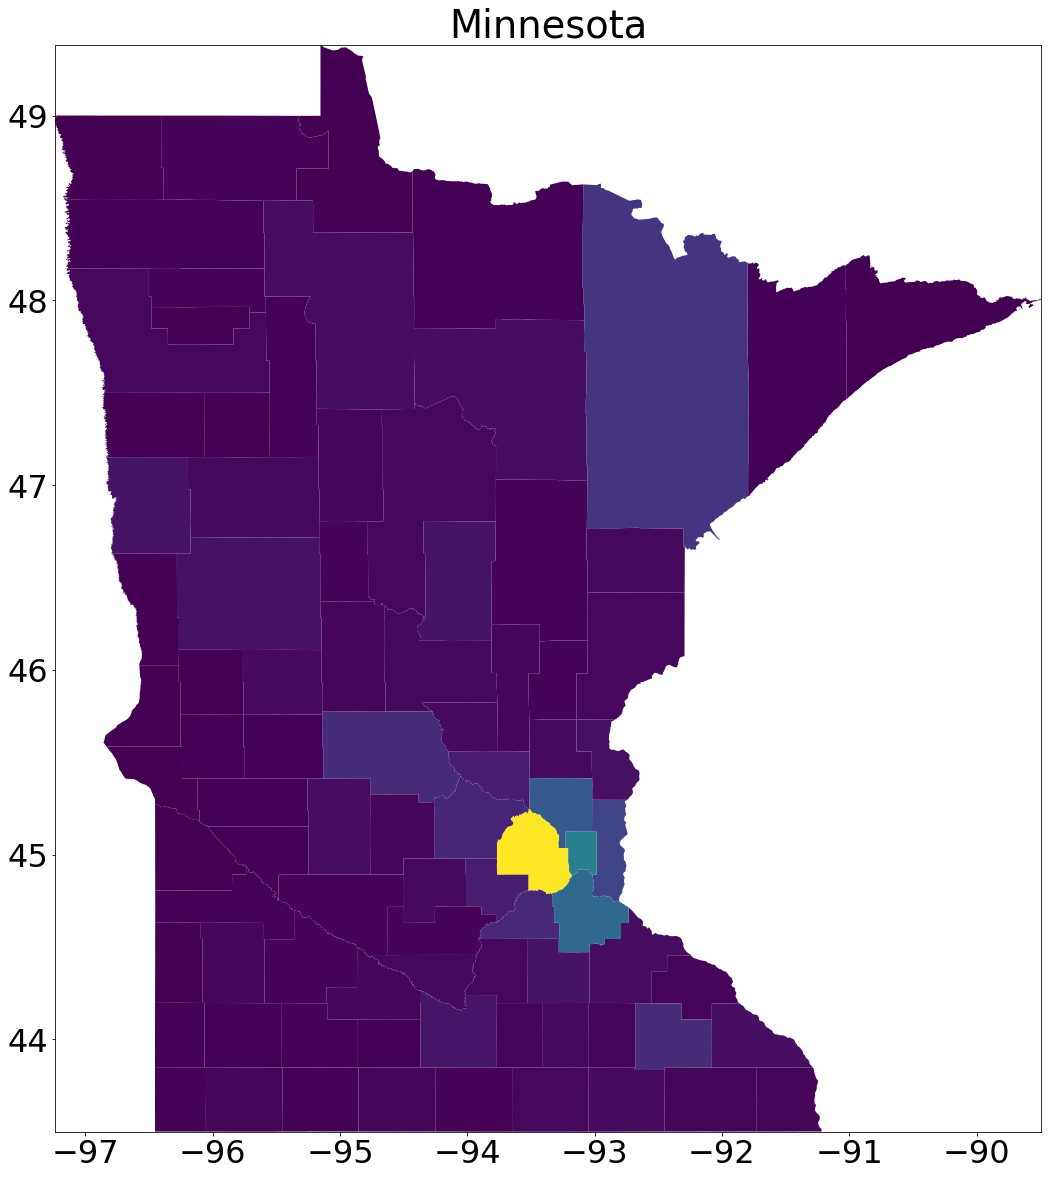

In [17]:
fig, ax = plt.subplots(figsize = (30,20))
map_data[map_data["state"] == "Minnesota"].plot(column = "Population", ax = ax)
ax.set_title("Minnesota")

In [18]:
def import_covid_data(FIPS_name):
    dataset = dw.load_dataset(
        "associatedpress/johns-hopkins-coronavirus-case-tracker",
        auto_update = True)
    covid_data = dataset.dataframes["2_cases_and_deaths_by_county_timeseries"]
    covid_data = covid_data[covid_data[FIPS_name] < 57000]
    covid_data = covid_data[covid_data[FIPS_name] > 0]
    
    covid_data[FIPS_name] = covid_data[FIPS_name].astype(np.int64)
    # format the date columns as datetime
    covid_data["date"] = pd.to_datetime(covid_data["date"])
    covid_data.set_index([FIPS_name, "date"], inplace = True)
    covid_data["state_abr"] = ""   
    for state, abr in state_dict.items():
        covid_data.loc[covid_data["state"] == state, "state_abr"] = abr
    covid_data["Location"] = covid_data["location_name"] + ", " + \
                                       covid_data["state_abr"]
    
    return covid_data
    
    

In [19]:
covid_data = import_covid_data(FIPS_name = fips_name)

C:\Users\JLCat\AppData\Roaming\Python\Python38\site-packages\datadotworld\models\dataset.py:206: UserWarning: Unable to set data frame dtypes automatically using 2_cases_and_deaths_by_county_timeseries schema. Data types may need to be adjusted manually. Error: Integer column has NA values in column 2
  warnings.warn(


In [22]:
covid_data

uid location_type location_name    state  \
fips_code date                                                        
1001      2020-01-22  84001001        county       Autauga  Alabama   
          2020-01-23  84001001        county       Autauga  Alabama   
          2020-01-24  84001001        county       Autauga  Alabama   
          2020-01-25  84001001        county       Autauga  Alabama   
          2020-01-26  84001001        county       Autauga  Alabama   
...                        ...           ...           ...      ...   
56045     2021-11-11  84056045        county        Weston  Wyoming   
          2021-11-12  84056045        county        Weston  Wyoming   
          2021-11-13  84056045        county        Weston  Wyoming   
          2021-11-14  84056045        county        Weston  Wyoming   
          2021-11-15  84056045        county        Weston  Wyoming   

                      total_population  cumulative_cases  \
fips_code date                                             
1001      2020-01-22           55200.0                 0   
          2020-01-23           55200.0                 0   
          2020-01-24           55200.0                 0   
          2020-01-25           55200.0                 0   
          2020-01-26           55200.0                 0   
...                                ...               ...   
56045     2021-11-11            7100.0              1168   
          2021-11-12            7100.0              1175   
          2021-11-13            7100.0              1175   
          2021-11-14            7100.0              1175   
          2021-11-15            7100.0              1178   

                      cumulative_cases_per_100_000  cumulative_deaths  \
fips_code date                                                          
1001      2020-01-22                          0.00                  0   
          2020-01-23                          0.00                  0   
          2020-01-24                          0.00                  0   
          2020-01-25                          0.00                  0   
          2020-01-26                          0.00                  0   
...                                            ...                ...   
56045     2021-11-11                      16450.70                 10   
          2021-11-12                      16549.30                 10   
          2021-11-13                      16549.30                 10   
          2021-11-14                      16549.30                 10   
          2021-11-15                      16591.55                 10   

                      cumulative_deaths_per_100_000  new_cases  new_deaths  \
fips_code date                                                               
1001      2020-01-22                           0.00        NaN         NaN   
          2020-01-23                           0.00        0.0         0.0   
          2020-01-24                           0.00        0.0         0.0   
          2020-01-25                           0.00        0.0         0.0   
          2020-01-26                           0.00        0.0         0.0   
...                                             ...        ...         ...   
56045     2021-11-11                         140.85        0.0         0.0   
          2021-11-12                         140.85        7.0         0.0   
          2021-11-13                         140.85        0.0         0.0   
          2021-11-14                         140.85        0.0         0.0   
          2021-11-15                         140.85        3.0         0.0   

                      new_cases_per_100_000  new_deaths_per_100_000  \
fips_code date                                                        
1001      2020-01-22                    NaN                     NaN   
          2020-01-23                   0.00                     0.0   
          2020-01-24                   0.00                     0.0   
  

In [42]:
covid_data[covid_data["state"] == "North Dakota"].groupby("date").sum()[["new_cases", "new_deaths"]]

,new_cases,new_deaths
date,,
2020-01-22,0.0,0.0
2020-01-23,0.0,0.0
2020-01-24,0.0,0.0
2020-01-25,0.0,0.0
2020-01-26,0.0,0.0
...,...,...
2021-11-11,624.0,2.0
2021-11-12,402.0,0.0
2021-11-13,499.0,11.0


Text(0.5, 1.0, 'United States')

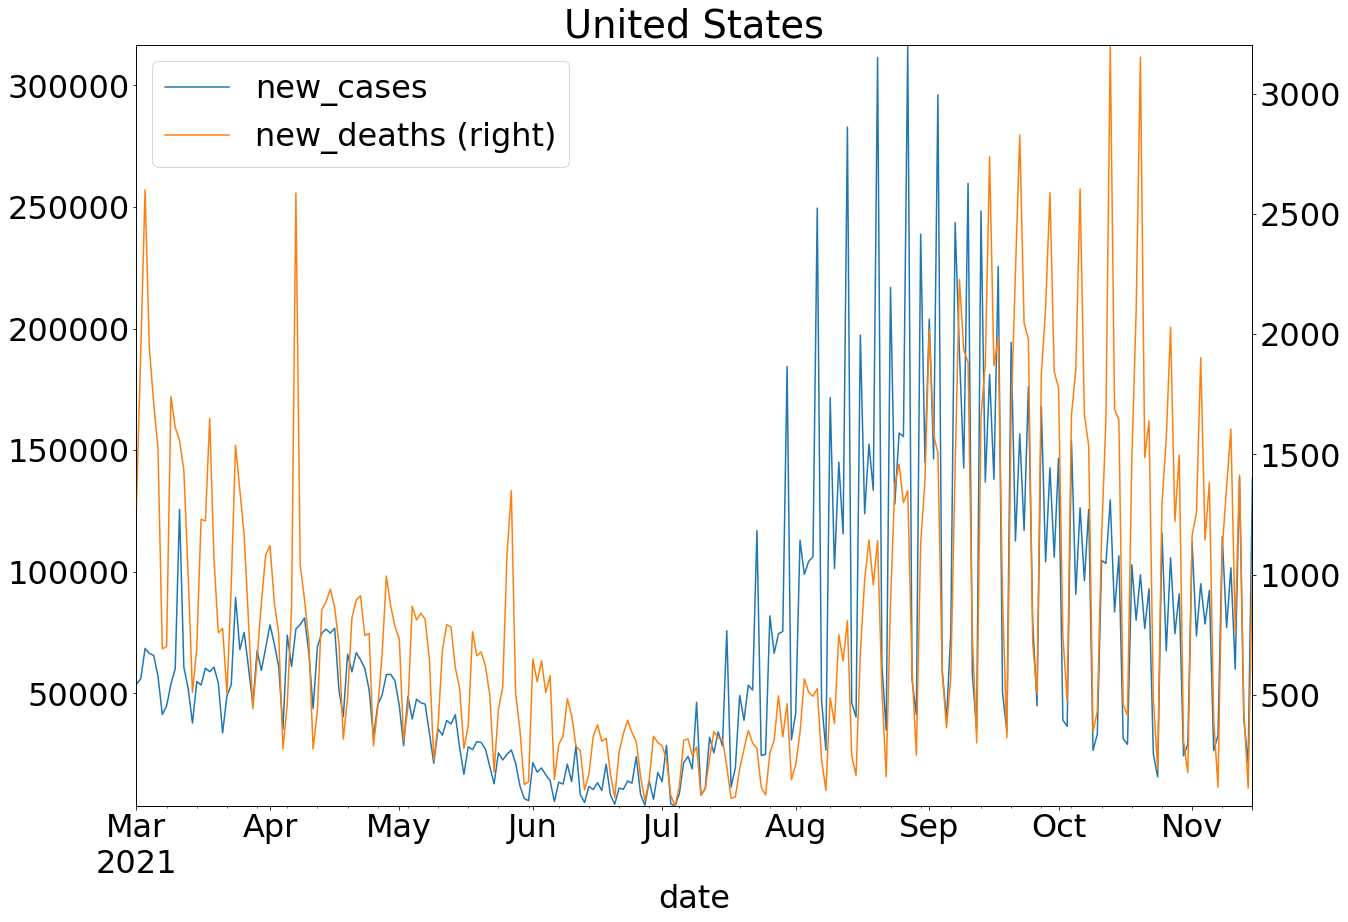

In [45]:
fig,ax = plt.subplots(figsize = (20,14))
covid_data.groupby("date").sum().loc["2021-03-01":,["new_cases", "new_deaths"]].plot.line(
    secondary_y = "new_deaths", ax = ax)
ax.set_title("United States")

Text(0.5, 1.0, 'United States')

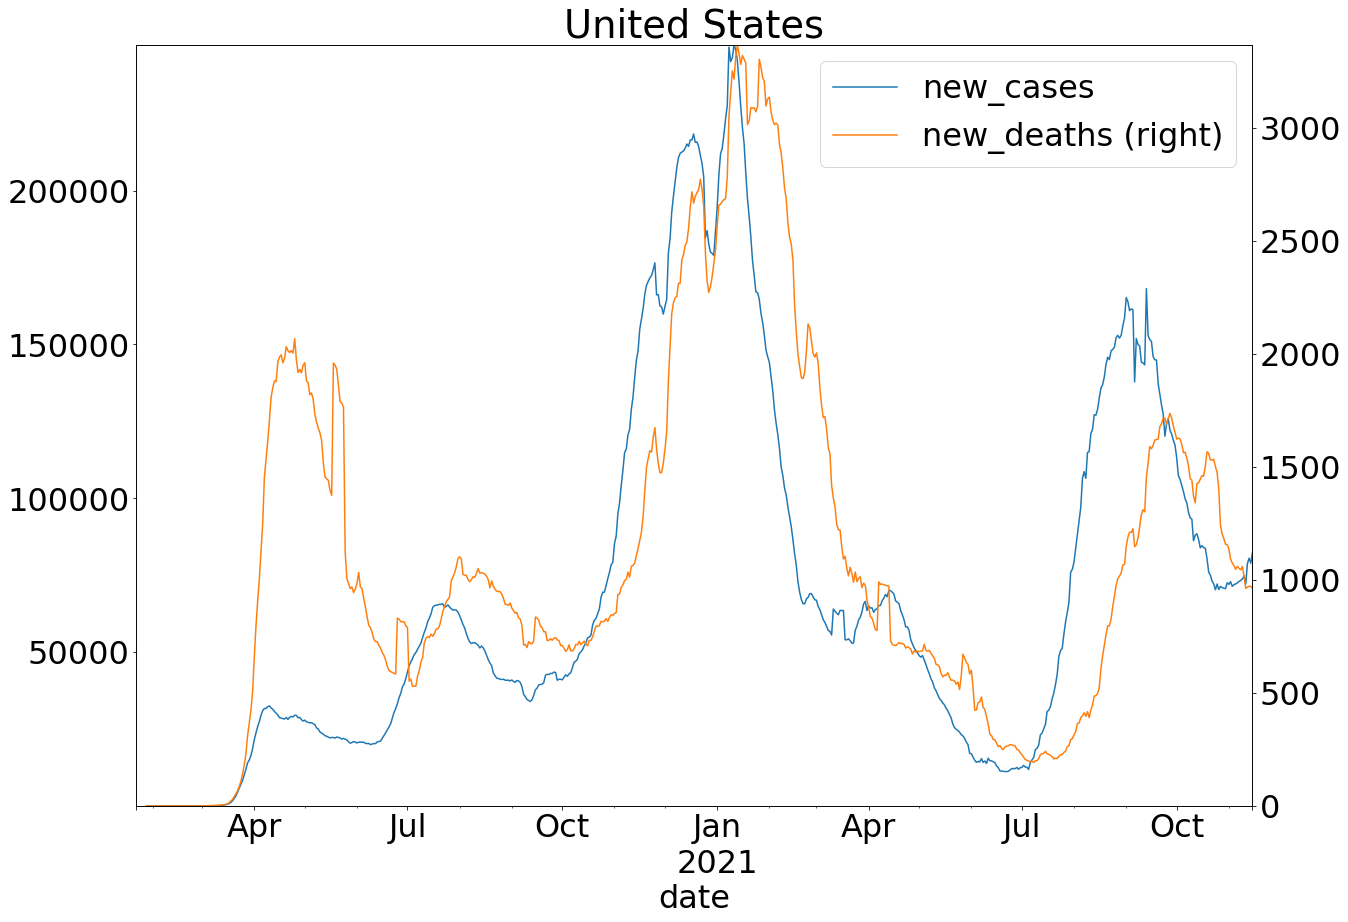

In [46]:
fig,ax = plt.subplots(figsize = (20,14))
covid_data.groupby("date").sum().loc[:,["new_cases", "new_deaths"]].rolling(7).mean().plot.line(
    secondary_y = "new_deaths", ax = ax)
ax.set_title("United States")

In [47]:
def create_merged_geo_dataframe(data, map_data, dates):
    data_frame_initialized = False
    
    counties = data.groupby("fips_code").mean().index
    for date in dates:
        agg_df = map_data[map_data.index.isin(counties)]
        agg_df["date"] = date
        if data_frame_initialized == False:
            matching_gpd = geopandas.GeoDataFrame(agg_df, 
                                                 crs = map_data.crs)
            data_frame_initialized = True
        else:
            matching_gpd = matching_gpd.append(
                agg_df,
                ignore_index = False)
    
    matching_gpd.reset_index(inplace = True)
    matching_gpd.set_index(["fips_code", "date"], inplace = True)
    matching_gpd.drop("state", axis = 1, inplace = True)
    
    matching_gpd = pd.concat([matching_gpd, data], axis = 1)
    
    return matching_gpd

In [48]:
dates = sorted(list(set(covid_data.index.get_level_values("date"))))
covid_data = create_merged_geo_dataframe(covid_data, map_data, dates)

In [49]:
covid_data

STATEFP COUNTYFP  COUNTYNS        AFFGEOID     NAME  \
fips_code date                                                              
1001      2020-01-22      1.0      001  00161526  0500000US01001  Autauga   
          2020-01-23      1.0      001  00161526  0500000US01001  Autauga   
          2020-01-24      1.0      001  00161526  0500000US01001  Autauga   
          2020-01-25      1.0      001  00161526  0500000US01001  Autauga   
          2020-01-26      1.0      001  00161526  0500000US01001  Autauga   
...                       ...      ...       ...             ...      ...   
56045     2021-11-11     56.0      045  01605086  0500000US56045   Weston   
          2021-11-12     56.0      045  01605086  0500000US56045   Weston   
          2021-11-13     56.0      045  01605086  0500000US56045   Weston   
          2021-11-14     56.0      045  01605086  0500000US56045   Weston   
          2021-11-15     56.0      045  01605086  0500000US56045   Weston   

                     LSAD         ALAND      AWATER  Population  \
fips_code date                                                    
1001      2020-01-22   06  1.539602e+09  25706961.0     55869.0   
          2020-01-23   06  1.539602e+09  25706961.0     55869.0   
          2020-01-24   06  1.539602e+09  25706961.0     55869.0   
          2020-01-25   06  1.539602e+09  25706961.0     55869.0   
          2020-01-26   06  1.539602e+09  25706961.0     55869.0   
...                   ...           ...         ...         ...   
56045     2021-11-11   06  6.210804e+09   5225499.0      6927.0   
          2021-11-12   06  6.210804e+09   5225499.0      6927.0   
          2021-11-13   06  6.210804e+09   5225499.0      6927.0   
          2021-11-14   06  6.210804e+09   5225499.0      6927.0   
          2021-11-15   06  6.210804e+09   5225499.0      6927.0   

                                                               geometry  ...  \
fips_code date                                                           ...   
1001      2020-01-22  POLYGON ((-86.92120 32.65754, -86.92035 32.658...  ...   
          2020-01-23  POLYGON ((-86.92120 32.65754, -86.92035 32.658...  ...   
          2020-01-24  POLYGON ((-86.92120 32.65754, -86.92035 32.658...  ...   
          2020-01-25  POLYGON ((-86.92120 32.65754, -86.92035 32.658...  ...   
          2020-01-26  POLYGON ((-86.92120 32.65754, -86.92035 32.658...  ...   
...                                                                 ...  ...   
56045     2021-11-11  POLYGON ((-105.08078 43.96622, -105.07928 44.1...  ...   
          2021-11-12  POLYGON ((-105.08078 43.96622, -105.07928 44.1...  ...   
          2021-11-13  POLYGON ((-105.08078 43.96622, -105.07928 44.1...  ...   
          2021-11-14  POLYGON ((-105.08078 43.96622, -105.07928 44.1...  ...   
          2021-11-15  POLYGON ((-105.08078 43.96622, -105.07928 44.1...  ...   

                      cumulative_deaths cumulative_deaths_per_100_000  \
fips_code date                                                          
1001      2020-01-22                  0                          0.00   
          2020-01-23                  0                          0.00   
          2020-01-24                  0                          0.00   
          2020-01-25                  0                          0.00   
          2020-01-26                  0                          0.00   
...                                 ...                           ...   
56045     2021-11-11                 10                        140.85   
          2021-11-12                 10                        140.85   
          2021-11-13                 10                        140.85   
          2021-11-14                 10                        140.85   
          2021-11-15                 10                        140.85   

                     new_cases new_deaths  new_cases_per_100_000  \
fips_code date                                                     
1001      2020-01-22 

In [50]:
def create_new_vars(covid_data):
    for key in ["cases", "deaths"]:
        cap_key = key.title()
        covid_data.rename(columns = {"cumulative_" + key : "Total " + cap_key,
                                     "new_"+key: "Daily " + cap_key,
                                     "new_" + key + "_7_day_rolling_avg":"Daily " + cap_key + " 7 Day MA"},
                         inplace = True)

        covid_data[cap_key + " per Million"] = covid_data[
            "Total " + cap_key].fillna(0)\
            .div(covid_data["total_population"]).mul(10 ** 6)
        
        # taking the rolling average; choice of number of days is passed as moving_average_days
        covid_data["Daily " + cap_key + " per Million 7 Day MA"] = \
            covid_data["Daily " + cap_key + " 7 Day MA"]\
            .div(covid_data["total_population"]).mul(10 ** 6)
        

create_new_vars(covid_data)

In [51]:
covid_data

STATEFP COUNTYFP  COUNTYNS        AFFGEOID     NAME  \
fips_code date                                                              
1001      2020-01-22      1.0      001  00161526  0500000US01001  Autauga   
          2020-01-23      1.0      001  00161526  0500000US01001  Autauga   
          2020-01-24      1.0      001  00161526  0500000US01001  Autauga   
          2020-01-25      1.0      001  00161526  0500000US01001  Autauga   
          2020-01-26      1.0      001  00161526  0500000US01001  Autauga   
...                       ...      ...       ...             ...      ...   
56045     2021-11-11     56.0      045  01605086  0500000US56045   Weston   
          2021-11-12     56.0      045  01605086  0500000US56045   Weston   
          2021-11-13     56.0      045  01605086  0500000US56045   Weston   
          2021-11-14     56.0      045  01605086  0500000US56045   Weston   
          2021-11-15     56.0      045  01605086  0500000US56045   Weston   

                     LSAD         ALAND      AWATER  Population  \
fips_code date                                                    
1001      2020-01-22   06  1.539602e+09  25706961.0     55869.0   
          2020-01-23   06  1.539602e+09  25706961.0     55869.0   
          2020-01-24   06  1.539602e+09  25706961.0     55869.0   
          2020-01-25   06  1.539602e+09  25706961.0     55869.0   
          2020-01-26   06  1.539602e+09  25706961.0     55869.0   
...                   ...           ...         ...         ...   
56045     2021-11-11   06  6.210804e+09   5225499.0      6927.0   
          2021-11-12   06  6.210804e+09   5225499.0      6927.0   
          2021-11-13   06  6.210804e+09   5225499.0      6927.0   
          2021-11-14   06  6.210804e+09   5225499.0      6927.0   
          2021-11-15   06  6.210804e+09   5225499.0      6927.0   

                                                               geometry  ...  \
fips_code date                                                           ...   
1001      2020-01-22  POLYGON ((-86.92120 32.65754, -86.92035 32.658...  ...   
          2020-01-23  POLYGON ((-86.92120 32.65754, -86.92035 32.658...  ...   
          2020-01-24  POLYGON ((-86.92120 32.65754, -86.92035 32.658...  ...   
          2020-01-25  POLYGON ((-86.92120 32.65754, -86.92035 32.658...  ...   
          2020-01-26  POLYGON ((-86.92120 32.65754, -86.92035 32.658...  ...   
...                                                                 ...  ...   
56045     2021-11-11  POLYGON ((-105.08078 43.96622, -105.07928 44.1...  ...   
          2021-11-12  POLYGON ((-105.08078 43.96622, -105.07928 44.1...  ...   
          2021-11-13  POLYGON ((-105.08078 43.96622, -105.07928 44.1...  ...   
          2021-11-14  POLYGON ((-105.08078 43.96622, -105.07928 44.1...  ...   
          2021-11-15  POLYGON ((-105.08078 43.96622, -105.07928 44.1...  ...   

                      new_cases_per_100_000 new_deaths_per_100_000  \
fips_code date                                                       
1001      2020-01-22                    NaN                    NaN   
          2020-01-23                   0.00                    0.0   
          2020-01-24                   0.00                    0.0   
          2020-01-25                   0.00                    0.0   
          2020-01-26                   0.00                    0.0   
...                                     ...                    ...   
56045     2021-11-11                   0.00                    0.0   
          2021-11-12                  98.59                    0.0   
          2021-11-13                   0.00                    0.0   
          2021-11-14                   0.00                    0.0   
          2021-11-15                  42.25                    0.0   

                     Daily Cases 7 Day MA Daily Deaths 7 Day MA  state_abr  \
fips_code date                                                               
1001      2020-01-22                  Na

Text(0.5, 1.0, 'Daily Deaths per Million 7 Day MA')

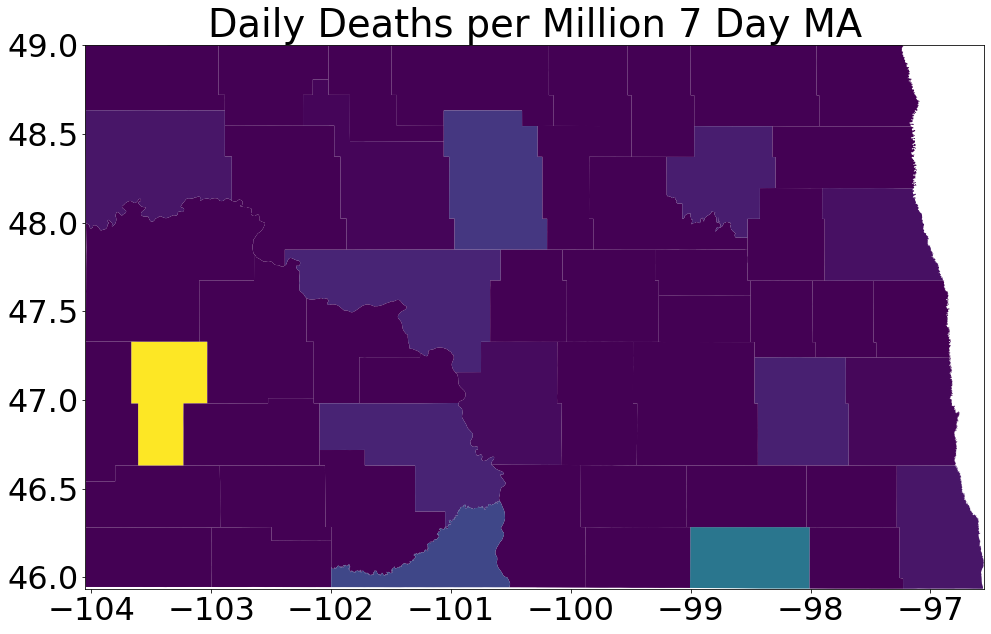

In [59]:
# selected data by state
nd_data = covid_data[covid_data["state"] == "North Dakota"]

# select data by date
nd_data = nd_data[nd_data.index.get_level_values("date") == "2021-11-15"]

# then plot
fig, ax = plt.subplots(figsize = (20,10))
key = "Daily Deaths per Million 7 Day MA"
nd_data.plot(column = key, ax = ax)#, cmap = "Reds")
ax.set_title(key)

In [60]:
start_date = "01-01-2021"     
end_date = dates[-1]

In [68]:
def select_data_within_bounds(data, minx, miny, maxx, maxy):
    data = data[data.bounds["maxx"] <= maxx]
    data = data[data.bounds["maxy"] <= maxy]
    data = data[data.bounds["minx"] >= minx]
    data = data[data.bounds["miny"] >= miny]
    
    return data


date = dates[-1]

if "map_bounded" not in locals():
    minx = covid_data[covid_data.index.get_level_values("date")== date].bounds["minx"].min()
    miny = covid_data[covid_data.index.get_level_values("date")== date].bounds["miny"].min()
    maxx = -58
    maxy = covid_data[covid_data.index.get_level_values("date")== date].bounds["maxy"].max()
    # find counties using only 1 date, only performs operation once instead of 
    # several hundred times
    bounded_data =  select_data_within_bounds(covid_data[covid_data.index.get_level_values("date")== date], minx, miny, maxx, maxy)
    counties = bounded_data.groupby("fips_code").mean().index
    covid_map_data =covid_data[covid_data.index.get_level_values("fips_code").isin(counties)]
    map_bounded = True  


In [70]:
covid_map_data

STATEFP COUNTYFP  COUNTYNS        AFFGEOID     NAME  \
fips_code date                                                              
1001      2020-01-22      1.0      001  00161526  0500000US01001  Autauga   
          2020-01-23      1.0      001  00161526  0500000US01001  Autauga   
          2020-01-24      1.0      001  00161526  0500000US01001  Autauga   
          2020-01-25      1.0      001  00161526  0500000US01001  Autauga   
          2020-01-26      1.0      001  00161526  0500000US01001  Autauga   
...                       ...      ...       ...             ...      ...   
56045     2021-11-11     56.0      045  01605086  0500000US56045   Weston   
          2021-11-12     56.0      045  01605086  0500000US56045   Weston   
          2021-11-13     56.0      045  01605086  0500000US56045   Weston   
          2021-11-14     56.0      045  01605086  0500000US56045   Weston   
          2021-11-15     56.0      045  01605086  0500000US56045   Weston   

                     LSAD         ALAND      AWATER  Population  \
fips_code date                                                    
1001      2020-01-22   06  1.539602e+09  25706961.0     55869.0   
          2020-01-23   06  1.539602e+09  25706961.0     55869.0   
          2020-01-24   06  1.539602e+09  25706961.0     55869.0   
          2020-01-25   06  1.539602e+09  25706961.0     55869.0   
          2020-01-26   06  1.539602e+09  25706961.0     55869.0   
...                   ...           ...         ...         ...   
56045     2021-11-11   06  6.210804e+09   5225499.0      6927.0   
          2021-11-12   06  6.210804e+09   5225499.0      6927.0   
          2021-11-13   06  6.210804e+09   5225499.0      6927.0   
          2021-11-14   06  6.210804e+09   5225499.0      6927.0   
          2021-11-15   06  6.210804e+09   5225499.0      6927.0   

                                                               geometry  ...  \
fips_code date                                                           ...   
1001      2020-01-22  POLYGON ((-86.92120 32.65754, -86.92035 32.658...  ...   
          2020-01-23  POLYGON ((-86.92120 32.65754, -86.92035 32.658...  ...   
          2020-01-24  POLYGON ((-86.92120 32.65754, -86.92035 32.658...  ...   
          2020-01-25  POLYGON ((-86.92120 32.65754, -86.92035 32.658...  ...   
          2020-01-26  POLYGON ((-86.92120 32.65754, -86.92035 32.658...  ...   
...                                                                 ...  ...   
56045     2021-11-11  POLYGON ((-105.08078 43.96622, -105.07928 44.1...  ...   
          2021-11-12  POLYGON ((-105.08078 43.96622, -105.07928 44.1...  ...   
          2021-11-13  POLYGON ((-105.08078 43.96622, -105.07928 44.1...  ...   
          2021-11-14  POLYGON ((-105.08078 43.96622, -105.07928 44.1...  ...   
          2021-11-15  POLYGON ((-105.08078 43.96622, -105.07928 44.1...  ...   

                      new_cases_per_100_000 new_deaths_per_100_000  \
fips_code date                                                       
1001      2020-01-22                    NaN                    NaN   
          2020-01-23                   0.00                    0.0   
          2020-01-24                   0.00                    0.0   
          2020-01-25                   0.00                    0.0   
          2020-01-26                   0.00                    0.0   
...                                     ...                    ...   
56045     2021-11-11                   0.00                    0.0   
          2021-11-12                  98.59                    0.0   
          2021-11-13                   0.00                    0.0   
          2021-11-14                   0.00                    0.0   
          2021-11-15                  42.25                    0.0   

                     Daily Cases 7 Day MA Daily Deaths 7 Day MA  state_abr  \
fips_code date                                                               
1001      2020-01-22                  Na

In [71]:
covid_map_data.fillna(0, inplace = True)

C:\Users\JLCat\anaconda3\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


<AxesSubplot:>

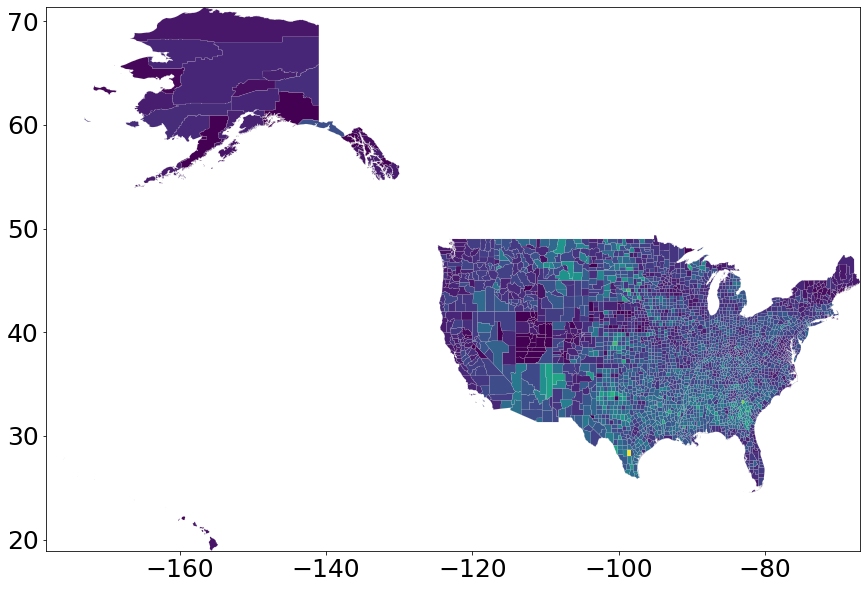

In [75]:
fig, ax = plt.subplots(figsize = (20,10))
plt.rcParams.update({"font.size": 30})
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
key = "Deaths per Million"
df = covid_map_data[covid_map_data.index.get_level_values("date")==date]
df.plot(ax = ax, column = key, linewidth = .1,
       edgecolor = "lightgrey")

Int64Index([], dtype='int64', name='fips_code')